<a href="https://colab.research.google.com/github/ViniitMe/Machine-Learning-foundation-and-Applications/blob/master/15MI33017_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Populating the interactive namespace from numpy and matplotlib


In [0]:
# 5D Gaussian Distribution points generation
mu1 = [2, 8, 4, 3, 5]
var1 = [[2,1,0,1,0], [1,2,0,1,0], [0,0,2,0,0], [1,1,0,2,0], [0,0,0,0,2]]

mu2 = [2, 8, 4, 9, 5]
var2 = [[2,1,0,1,1], [1,2,0,1,0], [0,0,2,0,0], [1,1,0,2,0], [0,0,0,0,2]]

mu3 = [8, 8, 4, 9, 5]
var3 = [[2,1,0,1,1], [1,2,0,1,0], [0,0,2,0,0], [1,1,0,2,0], [0,0,0,0,2]]

In [0]:
# Generating training samples
x1 = np.random.multivariate_normal(mu1, var1, 100)
x2 = np.random.multivariate_normal(mu2, var2, 100)
x3 = np.random.multivariate_normal(mu3, var3, 100)

x_train = np.concatenate((x1, x2, x3))
y_train = np.concatenate((np.ones((100,1)), 2 * np.ones((100,1)), 3 * np.ones((100,1))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
x_train

array([[1.90218883, 7.87217042, 4.01914154, 2.6273678 , 4.60888591],
       [0.13410772, 6.09987247, 0.8753505 , 1.88498512, 6.2783634 ],
       [1.9834748 , 8.10409061, 4.31790678, 3.14795914, 7.20728632],
       ...,
       [9.69766267, 9.22797714, 5.13525112, 8.16547496, 5.43019899],
       [5.97678655, 6.61482098, 3.46056015, 6.12440047, 4.30198747],
       [7.2101448 , 7.8604363 , 6.01396409, 8.88493005, 5.53027322]])

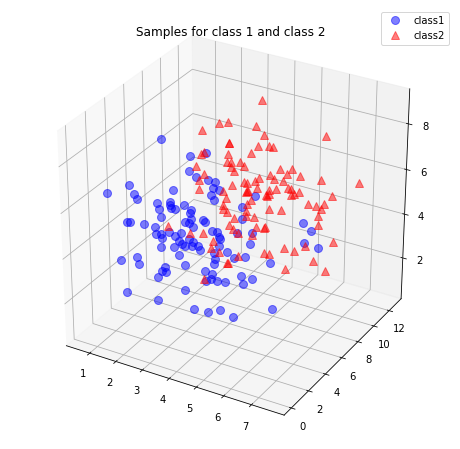

In [0]:
#Plot the data for any three dimension (Optional)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
# ax.plot(x1[:,0], x2[:,], x3[:,2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
# ax.plot(x1[:,0], x2[:,1], x3[:,2], '^', markersize=8, alpha=0.5, color='red', label='class2')

ax.plot(x1[:,2], x1[:,3], x1[:,4], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(x2[:,2], x2[:,3], x2[:,4], '^', markersize=8, alpha=0.5, color='red', label='class2')
# ax.plot(x3[:,2], x3[:,3], x3[:,4], '^', markersize=8, alpha=0.5, color='red', label='class3')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [0]:
# Generating test samples
t1 =  np.random.multivariate_normal(mu1, var1, 20)
t2 =  np.random.multivariate_normal(mu2, var2, 20)
t3 =  np.random.multivariate_normal(mu3, var3, 20)


x_test = np.concatenate((t1, t2, t3))
y_test = np.concatenate((np.ones((20,1)), 2 * np.ones((20,1)), 3 * np.ones((20,1))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
print("shape of x_train: " + str(x_train.shape))
print("shape of y_train: " + str(y_train.shape))

print("shape of x_test: " + str(x_test.shape))
print("shape of y_test: " + str(y_test.shape))

shape of x_train: (300, 5)
shape of y_train: (300, 1)
shape of x_test: (60, 5)
shape of y_test: (60, 1)


#KNN

In [0]:
acc = []
neighbors = [1,2,3,4,5,6,7,8,9,10]
for i in range(10):
  clf = KNeighborsClassifier(n_neighbors=neighbors[i])
  clf.fit(x_train,y_train.ravel())
  y_pred = clf.predict(x_test)
  acc.append(accuracy_score(y_test,y_pred))

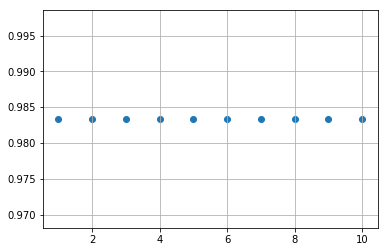

In [0]:
plt.grid()
plt.scatter(neighbors, acc)

#Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
acc = []
depth = [1,2,3,4,5,6,7,8,9,10]
for i  in range(10):
  clf = DecisionTreeClassifier(max_depth = depth[i])
  clf.fit(x_train, y_train.ravel())
  y_pred = clf.predict(x_test)
  acc.append(accuracy_score(y_test,y_pred))


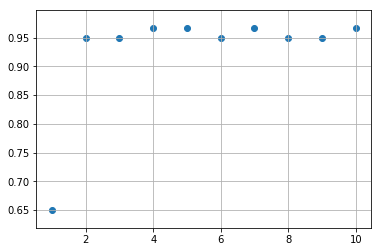

In [0]:
plt.grid()
plt.scatter(neighbors, acc)

#PCA

In [0]:
#1. Taking the whole dataset ignoring the class labels
x_train.shape

(300, 5)

In [0]:
mean = []
for i in range(x_train.shape[1]):
  mean.append(x_train[:, i].mean())
 
# Method2
# M = np.mean(x_train.T, axis=1)

In [0]:
print(mean)

[4.062709633461743, 7.928098054018128, 3.9548044045347432, 6.962380622181257, 5.068158442443556]


In [0]:
# Centering the columns by subtracting it from column means
C = x_train-M

In [0]:
# Calculating the covariance matrix using numpy
cov_mat = np.cov(C.T)
print(cov_mat)

[[1.04532272e+01 8.56495610e-01 2.93161547e-02 5.60071120e+00
  4.88743899e-01]
 [8.56495610e-01 1.84667793e+00 5.07176296e-02 1.32000641e+00
  4.64556053e-03]
 [2.93161547e-02 5.07176296e-02 1.92224680e+00 2.75243867e-01
  5.51593714e-02]
 [5.60071120e+00 1.32000641e+00 2.75243867e-01 9.99648921e+00
  1.58063531e-01]
 [4.88743899e-01 4.64556053e-03 5.51593714e-02 1.58063531e-01
  2.20980896e+00]]


In [0]:
# eigen decomposition of covariance matrix
values, vectors = np.linalg.eig(cov_mat)
print(vectors)
print(values)


[[-0.71462789 -0.69330724 -0.07757905  0.05109511 -0.00168312]
 [-0.10757141  0.11802863 -0.0239057   0.02821482 -0.98647356]
 [-0.01548455  0.0627765   0.22144662  0.97251175  0.03164862]
 [-0.69020769  0.70238003  0.032221   -0.0687606   0.15655486]
 [-0.03330083 -0.09008729  0.97125342 -0.21467672 -0.03682433]]
[16.01488791  4.69426598  2.18847619  1.89362147  1.63719851]


In [0]:
data.T.shape

(300, 5)

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(values[i]), vectors[:,i]) for i in range(len(values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

16.01488791118866
4.6942659833611655
2.1884761941993607
1.8936214740301247
1.6371985139855456


In [0]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(5,1), eig_pairs[1][1].reshape(5,1)))

In [0]:
matrix_w

array([[-0.71462789, -0.69330724],
       [-0.10757141,  0.11802863],
       [-0.01548455,  0.0627765 ],
       [-0.69020769,  0.70238003],
       [-0.03330083, -0.09008729]])

In [0]:
# project data
data = matrix_w.T.dot(C.T)

In [0]:
print(data.T.shape)

(300, 2)


In [0]:
# KNN on this data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.25)

In [0]:
acc = []
neighbors = [1,2,3,4,5,6,7,8,9,10]
for i in range(10):
  clf = KNeighborsClassifier(n_neighbors=neighbors[i])
  clf.fit(x_train,y_train.ravel())
  y_pred = clf.predict(x_test)
  acc.append(accuracy_score(y_test,y_pred))

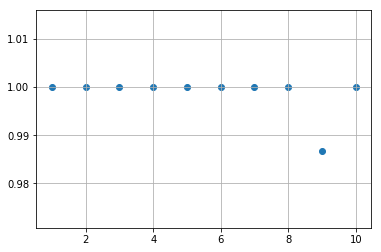

In [0]:
plt.grid()
plt.scatter(neighbors, acc)